<img src="https://i.imgur.com/u1otXPC.png" style="float: left; margin: 15px; height: 80px">

# Project 1

### Exploratory Data Analysis (EDA)

---
### Problem statement  

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

### Import packages

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="https://i.imgur.com/wLPdKgZ.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---
### 1.1 Load the file with the `csv` module and put it in a Python dictionary

In [2]:
satcsv = './sat_scores.csv'
drugcsv = './drug-use-by-age.csv'

datasat = pd.read_csv(satcsv)

In [3]:
print datasat.info()
datasat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [4]:
datasat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

In [5]:
sat_dict = {'state': ['CT', 'NJ','MA','NY','NH'],
           'rate': [82,81,79,77,72],
           'verbal':[509,499,511,495,520],
           'math':[510,513,515,505,516]}

In [215]:
sat_pd= pd.DataFrame(data=sat_dict)
sat_pd.dtypes

math       int64
rate       int64
state     object
verbal     int64
dtype: object

In [216]:
datasat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [217]:
datasat.head(10)
datasat.drop(51, axis=0, inplace=True)

### 1.4 Describing the data
The sat scores contain 4 columns of information : 
1. State: Refers to states in the U.S.
2. Rate: A percentage possibly referring to SAT passing rate of children
3. Verbal: Verbal Scores in the range of 482 - 593
4. Math: Math Scores in the range of 439 - 603

<img src="https://i.imgur.com/wLPdKgZ.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

In [218]:
# Create a data dictionary using pandas dataframe
sat_ddict = {'column':datasat.columns.tolist(),
            'description':['States of the U.S.','Passing rate of SAT','Verbal SAT scores','MATH SAT scores'],
            'data type':['string','integer','integer','integer']}
sat_ddf = pd.DataFrame(sat_ddict)

# Print the shape and data dictionary.
print 'Shape of SAT dataset:', datasat.shape
sat_ddf

Shape of SAT dataset: (51, 4)


,column,data type,description
0,State,string,States of the U.S.
1,Rate,integer,Passing rate of SAT
2,Verbal,integer,Verbal SAT scores
3,Math,integer,MATH SAT scores


<img src="https://i.imgur.com/wLPdKgZ.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Text(0.5,1,u'Frequency distribution of SAT passing rate')

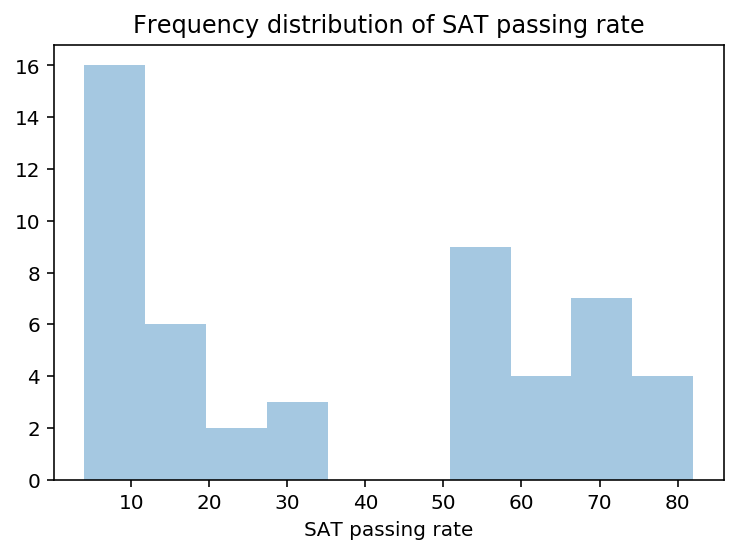

In [219]:
# Plot rate distplot

ratep = sns.distplot(datasat['Rate'], kde=False, bins=10)
ratep.set(xlabel='SAT passing rate')
ratep.set_title('Frequency distribution of SAT passing rate')


Text(0.5,1,u'Frequency distribution of SAT Math Scores')

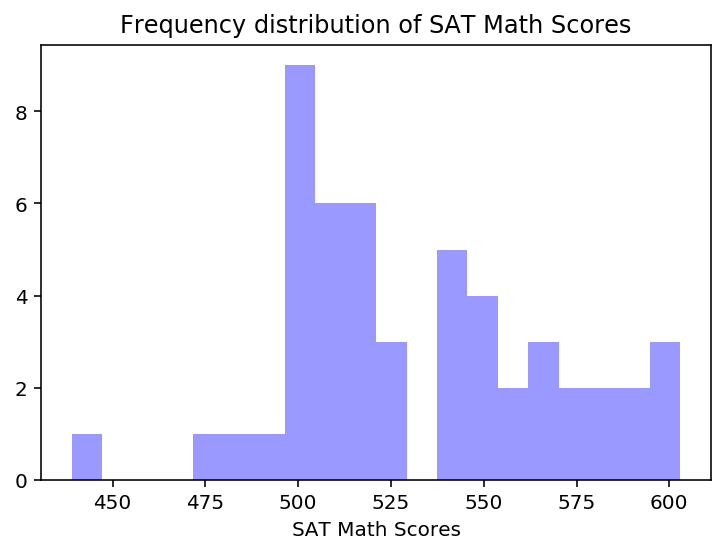

In [220]:
# Plot math distplot

mathp = sns.distplot(datasat['Math'], kde=False,bins=20, color='blue')
mathp.set(xlabel='SAT Math Scores')
mathp.set_title('Frequency distribution of SAT Math Scores')


Text(0.5,1,u'Frequency distribution of SAT Verbal Scores')

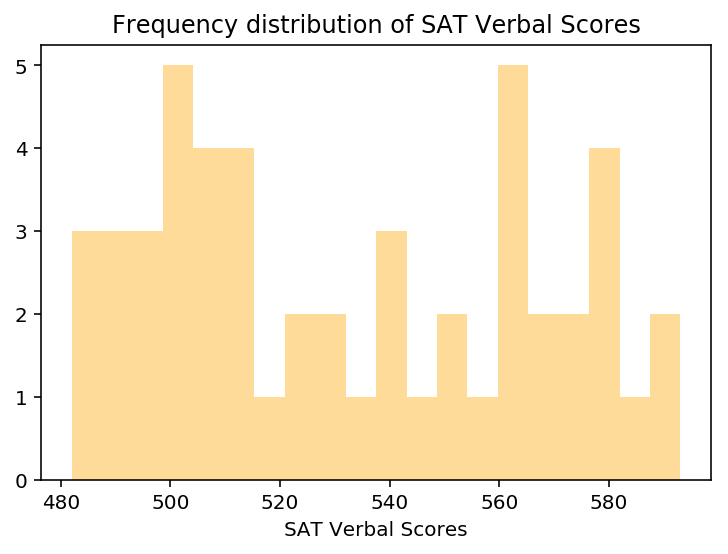

In [221]:
# Plot verbal distplot

verbp = sns.distplot(datasat['Verbal'], kde=False,bins=20, color='orange')
verbp.set(xlabel='SAT Verbal Scores')
verbp.set_title('Frequency distribution of SAT Verbal Scores')


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

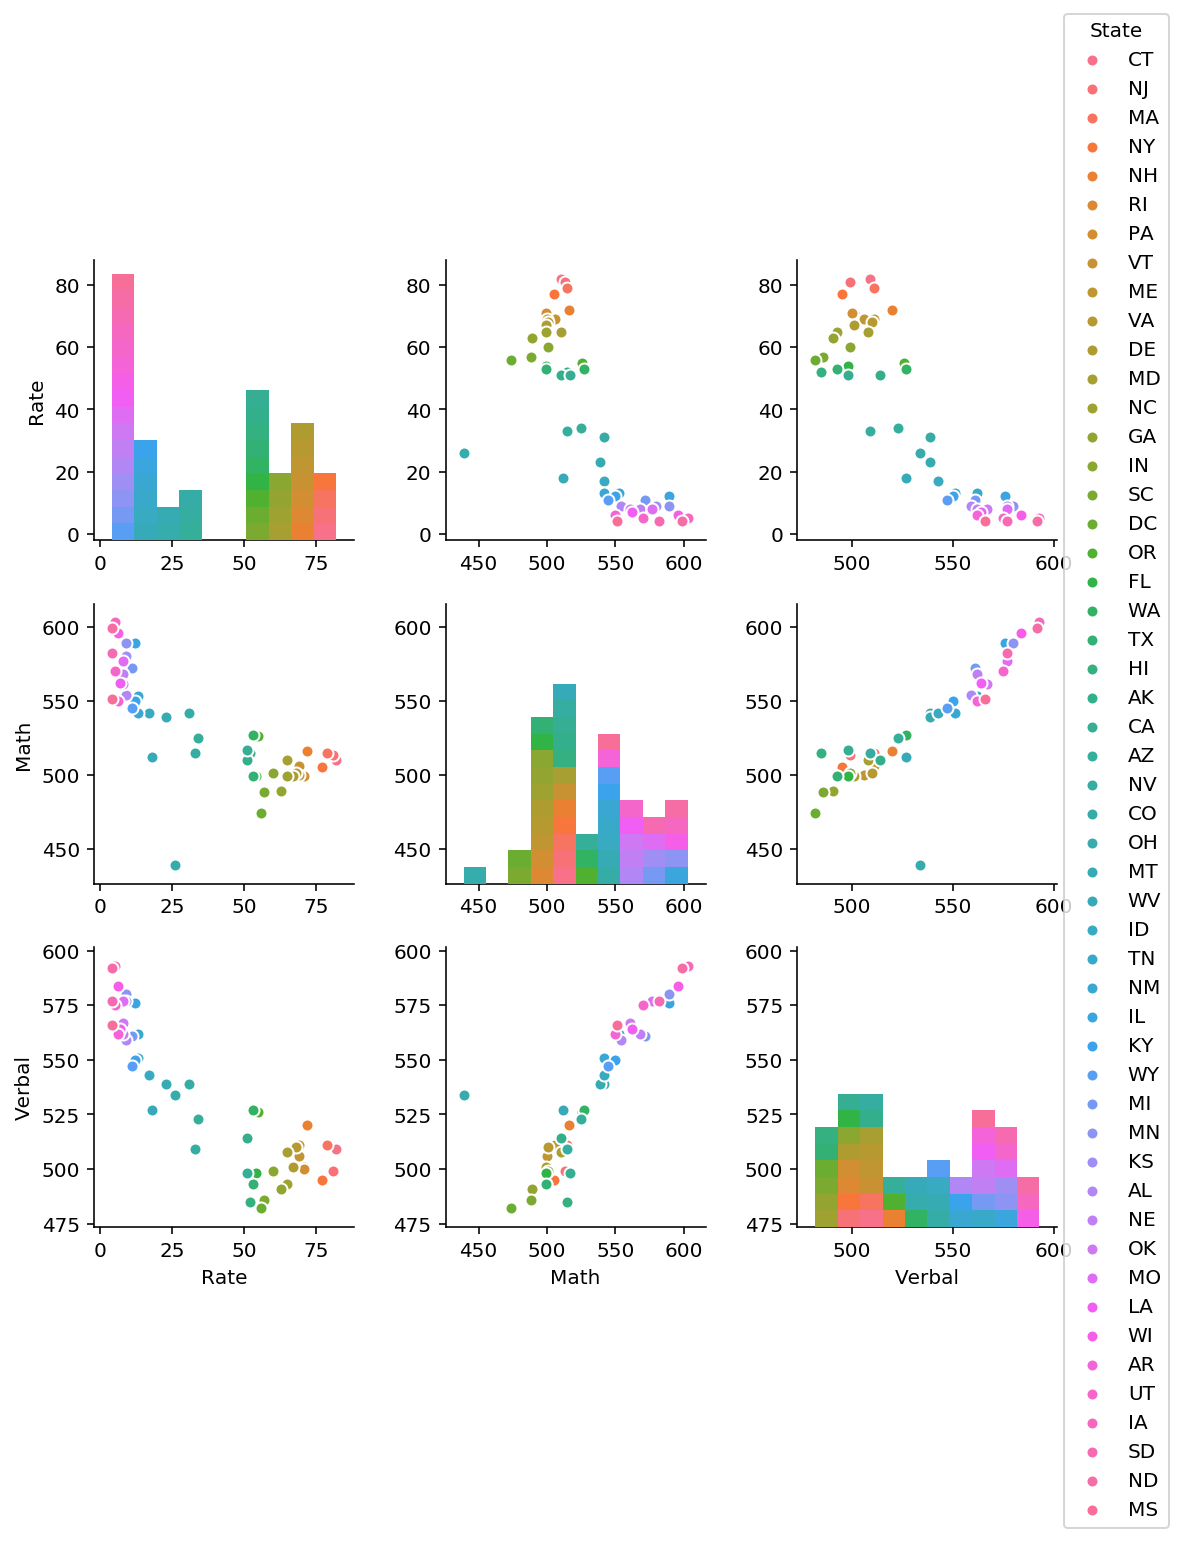

In [222]:
sns.pairplot(datasat, vars=['Rate', 'Math', 'Verbal'], hue='State')

## Intepretation of pair plot
**1. Rate seems to be negatively correlated with both math and verbal scores.**  
From plots 2 and 3 in the first row, as scores increase, rate decreases.

**2. Math and verbal appears to be positively correlated.**  
From plots (row 2, plot 3 and row 3, plot 2), as either variable increases, the other seems to increase as well.

**3. Adding hue dimension (assigned to state) may yield interesting information about the clustering of states according to SAT scores.**

<img src="https://i.imgur.com/wLPdKgZ.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

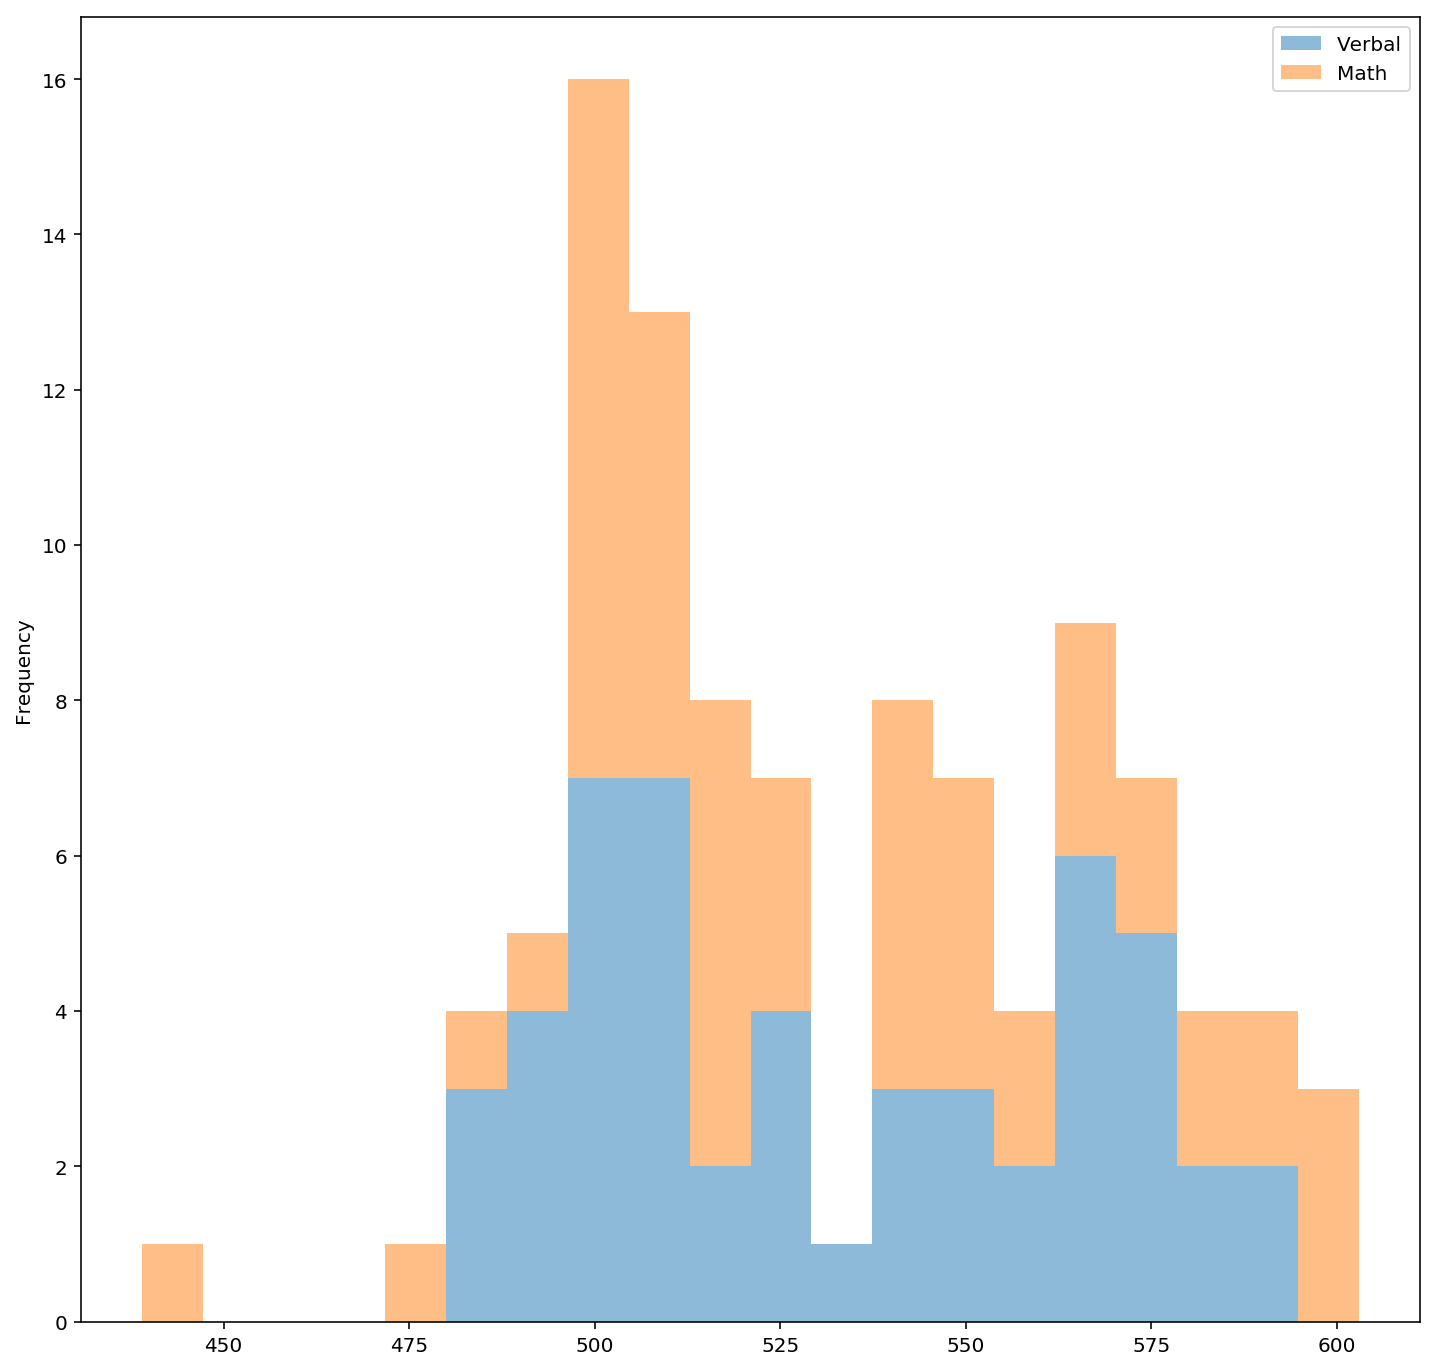

In [223]:
datasat[['Verbal','Math']].plot.hist(stacked=True, alpha=0.5,figsize=(12,12), bins=20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

Text(0.5,0,u'Index')

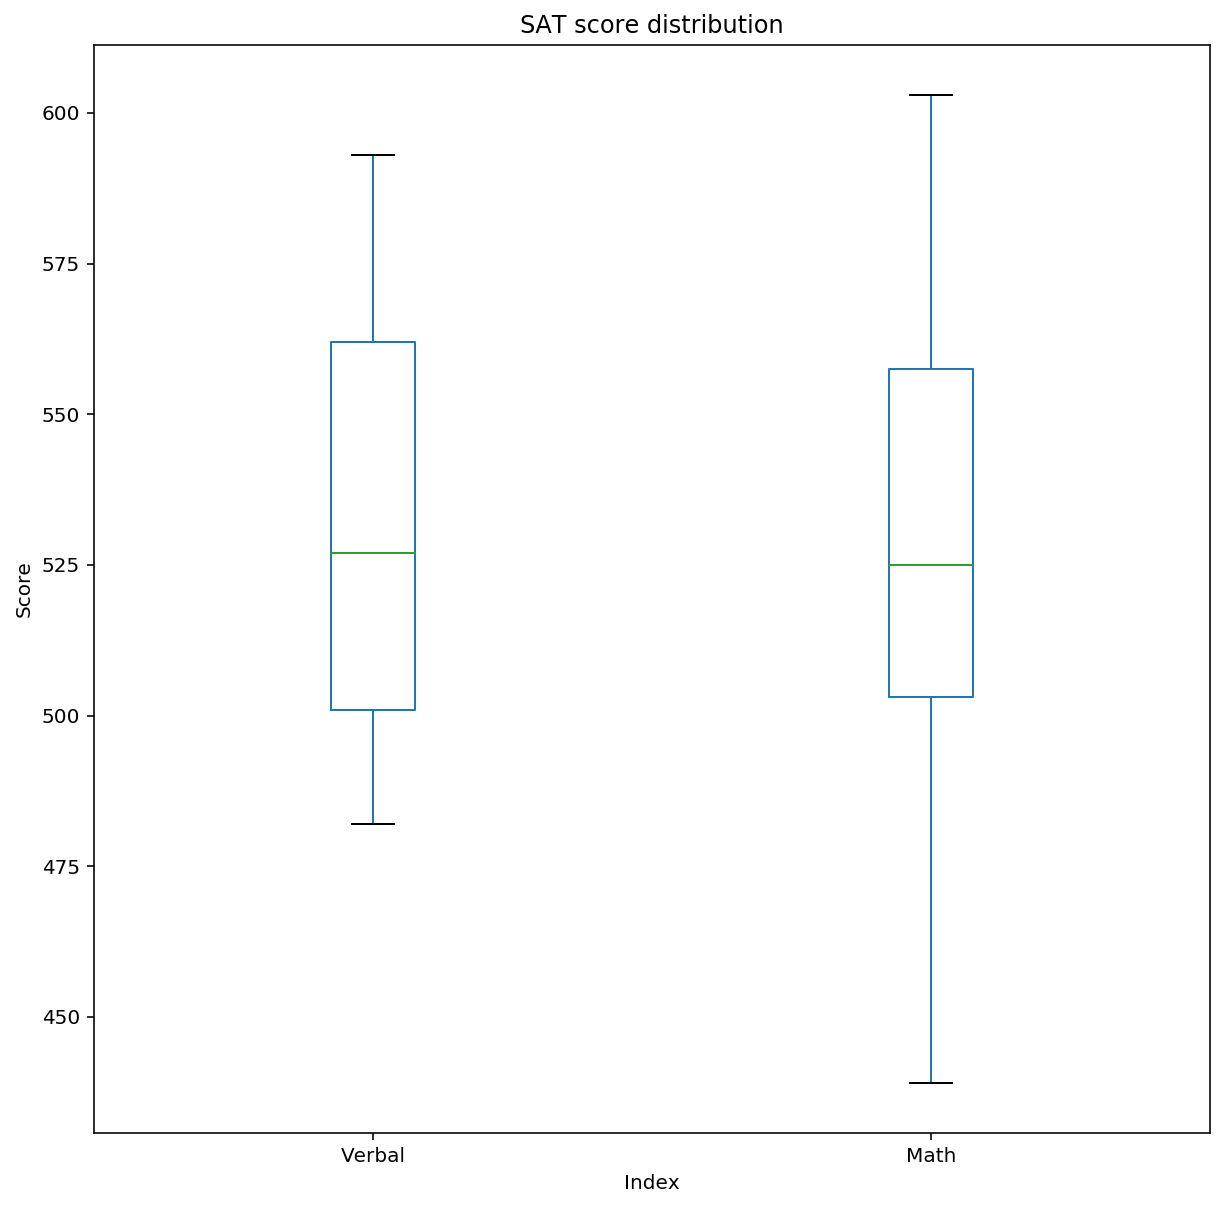

In [224]:
databox = datasat.sort_values(by=['Verbal','Math']).plot(kind='box', y=['Verbal','Math'], figsize=(10,10),title='SAT score distribution')
databox.set_ylabel('Score')
databox.set_xlabel('Index')

** Advantages of box plot **

Able to visualise spread of a feature as well as outliers quickly. 

** Problems with plotting rate in the same box plot: **

As the feature 'rate' has a smaller range of values compared to Verbal and Math, it will be unwise to plot rate on the same box plot as it may affect the visualisation of the data negatively.

<img src="https://i.imgur.com/wLPdKgZ.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

In [225]:
# divide each feature by its own mean, to normalise all features
datanorm = datasat.copy()
print datanorm.mean()

datanorm['Raten'] = datanorm['Rate'].map(lambda x: (x-37.153846)/np.std(datanorm['Rate']))
datanorm['Verbaln'] = datanorm['Verbal'].map(lambda x: (x-532.019231)/np.std(datanorm['Verbal']))
datanorm['Mathn'] = datanorm['Math'].map(lambda x: (x-531.5)/np.std(datanorm['Math']))

Rate       37.000000
Verbal    532.529412
Math      531.843137
dtype: float64


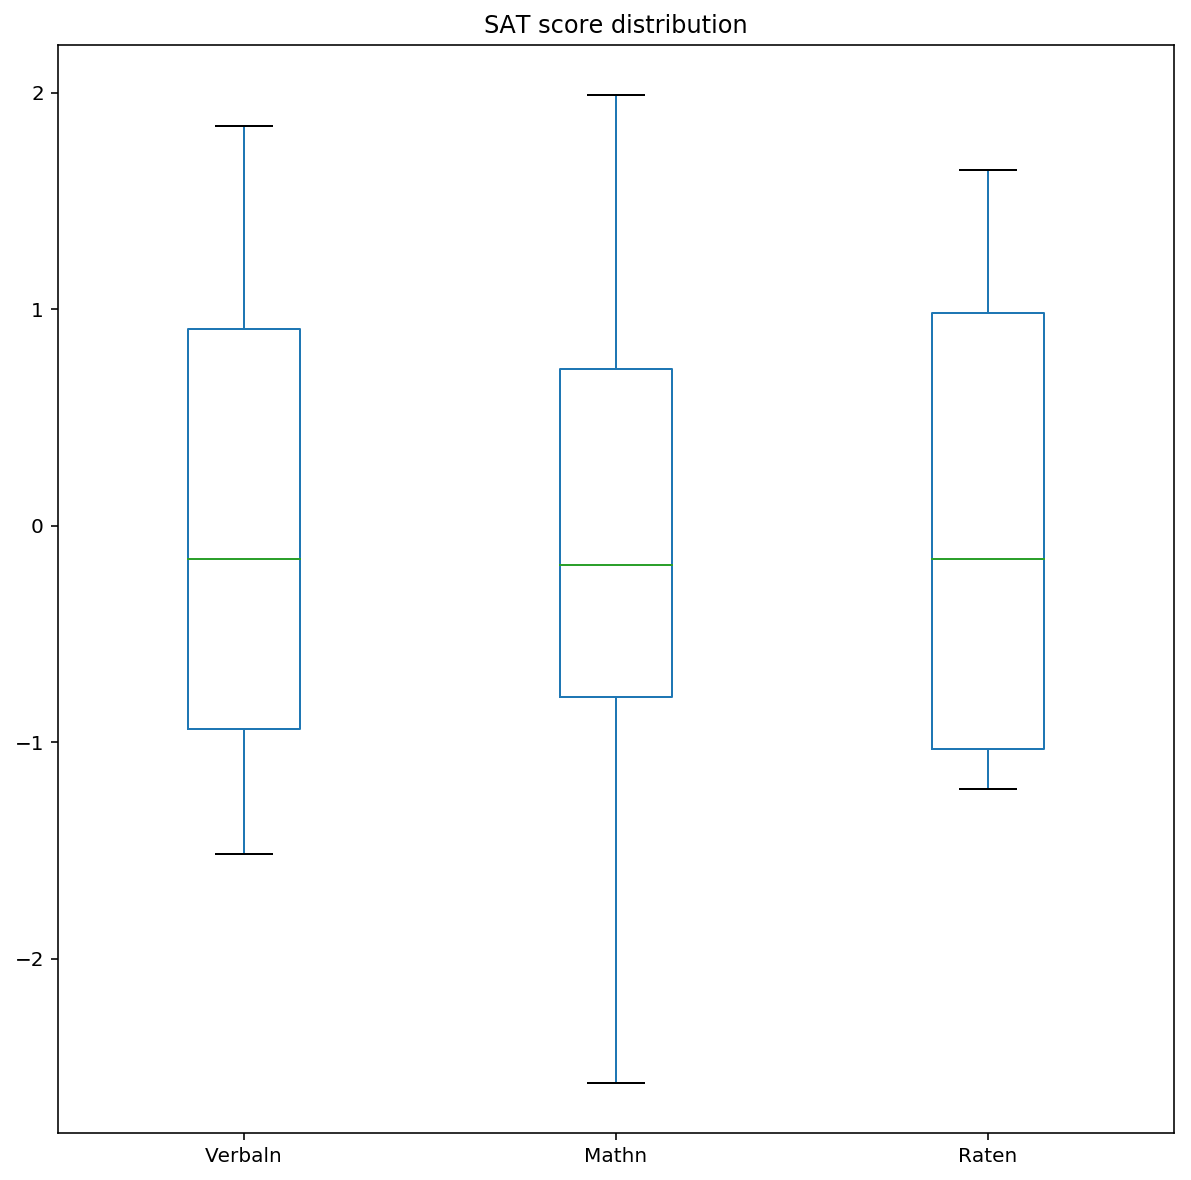

In [226]:
datanormp = datanorm.sort_values(by=['Verbaln','Mathn']).plot(kind='box', y=['Verbaln','Mathn','Raten'], figsize=(10,10),title='SAT score distribution')

### Justification

By dividing each feature by its own mean, it transforms each feature to be on the same scale (i.e., with a mean of 1 each). With this transformation, comparisons between the spread of data among features can be more intuitive.

<img src="https://i.imgur.com/wLPdKgZ.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---
### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?

In [227]:
verb_average = datasat['Verbal'].mean()
print 'verbal mean is ', verb_average
datasat.loc[datasat['Verbal']>verb_average]

verbal mean is  532.529411765


,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

In [228]:
verb_med = datasat['Verbal'].median()
print "verbal median is ", verb_med
datasat.loc[datasat['Verbal']>verb_med]

verbal median is  527.0


,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### Comparison between verbal > average and verbal > median

The number of states with verbal > average and verbal > median is 24 which is equal. Suggests that verbal has quite a symmetrical distribution.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

In [229]:
datasat['ver_diff'] = datasat['Verbal'] - datasat['Math']


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [230]:
dataasc = datasat.sort_values('ver_diff',ascending=False)
dataasc.head(3)

,State,Rate,Verbal,Math,ver_diff
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [231]:
datades = datasat.sort_values('ver_diff',ascending=True)
datades.head(3)

,State,Rate,Verbal,Math,ver_diff
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14



<img src="https://i.imgur.com/wLPdKgZ.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
## 6. Examine summary statistics
---

Checking the summary statistics!


### 6.1 Create the correlation matrix of your variables (excluding `State`).

In [232]:
datasat.corr()

,Rate,Verbal,Math,ver_diff
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
ver_diff,-0.098671,0.044527,-0.395574,1.000000


Rate seems to have a negative correlation with the verbal and math variables.  
Verbal and math seems to be positively correlated.

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

In [233]:
datasat.describe()

,Rate,Verbal,Math,ver_diff
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<span style="color:blue">Write-up:</span>
1. Count
    * Number of values in this column
2. Mean
    * Average of all non-null values in column
3. Std
    * Standard deviation of values in column
4. Min
    * Smallest value in column
5. 25%, 50%, 75%
    * 25<sup>th</sup>, 50<sup>th</sup>, 75<sup>th</sup> Percentile of values in column
6. Max
    * Biggest value in column

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [234]:
datasat.cov()

,Rate,Verbal,Math,ver_diff
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
ver_diff,-43.06,23.529412,-227.370196,250.899608


<span style="color:blue">Answers to prompt questions:</span>
1. Covariance measures how 2 variables vary together while correlation measures how one variable is dependent on the other.
2. Correlation can be obtained by dividing the covariance with the product of standard deviation of the 2 variables.
3. Correlation will be able to tell us when a variable increases, whether the other increases or decreases.


<img src="https://i.imgur.com/wLPdKgZ.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

### 7.1

In [235]:
df1 = pd.read_csv(drugcsv)

df1.head(1)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0


In [236]:
df1.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [237]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [238]:
for col in df1.columns:
    print str(col), df1[col].unique()

# this reveals that '-' is used to indicate NaN values

age ['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64' '65+']
n [2798 2757 2792 2956 3058 3038 2469 2223 2271 2354 4707 4591 2628 2864 7391
 3923 2448]
alcohol-use [  3.9   8.5  18.1  29.2  40.1  49.3  58.7  64.6  69.7  83.2  84.2  83.1
  80.7  77.5  75.   67.2]
alcohol-frequency [  3.   6.   5.  10.  13.  24.  36.  48.  52.]
marijuana-use [  1.1   3.4   8.7  14.5  22.5  28.   33.7  33.4  34.   33.   28.4  24.9
  20.8  16.4  10.4   7.3   1.2]
marijuana-frequency [  4.  15.  24.  25.  30.  36.  52.  60.  72.  48.]
cocaine-use [ 0.1  0.5  1.   2.   3.2  4.1  4.9  4.8  4.5  4.   2.1  1.5  0.9  0. ]
cocaine-frequency ['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-']
crack-use [ 0.   0.1  0.4  0.5  0.6]
crack-frequency ['-' '3.0' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '6.0' '15.0' '48.0'
 '62.0']
heroin-use [ 0.1  0.   0.2  0.4  0.5  0.9  0.6  1.1  0.7]
heroin-frequency ['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '4

In [239]:
# Float values or return NaN function
def f(x):
    try:
        return np.float(x)
    except:
        return np.nan

df1['cocaine-frequency'] = df1['cocaine-frequency'].apply(f)
df1['crack-frequency'] = df1['crack-frequency'].apply(f)
df1['heroin-frequency'] = df1['heroin-frequency'].apply(f)
df1['inhalant-frequency'] = df1['inhalant-frequency'].apply(f)
df1['oxycontin-frequency'] = df1['oxycontin-frequency'].apply(f)
df1['meth-frequency'] = df1['meth-frequency'].apply(f)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [240]:
# clean use columns with 0, we cant possibly have 0 use with frequency being available
# age, cocaine freq, crack freq, heroin freq, inhalant freq, oxycontin freq,meth freq needs to be cleaned, as they are of object type and should be int/float instead


df1.fillna(value=0.,inplace=True)

df1.replace(to_replace=0., value=0.0001,inplace=True)

df1

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1000,5.0000,0.0001,0.0001,0.1000,35.5000,0.2,52.0,1.6000,19.0000,2.0,36.0,0.1000,24.5000,0.2,52.0,0.2000,2.0,0.0001,0.0001,0.2000,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1000,1.0000,0.0001,3.0000,0.0001,0.0001,0.6,6.0,2.5000,12.0000,2.4,14.0,0.1000,41.0000,0.3,25.5,0.3000,4.0,0.1000,5.0000,0.1000,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1000,5.5000,0.0001,0.0001,0.1000,2.0000,1.6,3.0,2.6000,5.0000,3.9,12.0,0.4000,4.5000,0.9,5.0,0.8000,12.0,0.1000,24.0000,0.2000,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5000,4.0000,0.1000,9.5000,0.2000,1.0000,2.1,4.0,2.5000,5.5000,5.5,10.0,0.8000,3.0000,2.0,4.5,1.5000,6.0,0.3000,10.5000,0.4000,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0000,7.0000,0.0001,1.0000,0.1000,66.5000,3.4,3.0,3.0000,3.0000,6.2,7.0,1.1000,4.0000,2.4,11.0,1.8000,9.5,0.3000,36.0000,0.2000,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0000,5.0000,0.1000,21.0000,0.1000,64.0000,4.8,3.0,2.0000,4.0000,8.5,9.0,1.4000,6.0000,3.5,7.0,2.8000,9.0,0.6000,48.0000,0.5000,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2000,5.0000,0.4000,10.0000,0.4000,46.0000,7.0,4.0,1.8000,4.0000,9.2,12.0,1.7000,7.0000,4.9,12.0,3.0000,8.0,0.5000,12.0000,0.4000,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1000,5.5000,0.5000,2.0000,0.5000,180.0000,8.6,3.0,1.4000,3.0000,9.4,12.0,1.5000,7.5000,4.2,4.5,3.3000,6.0,0.4000,105.0000,0.3000,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9000,8.0000,0.6000,5.0000,0.9000,45.0000,7.4,2.0,1.5000,4.0000,10.0,10.0,1.7000,12.0000,5.4,10.0,4.0000,12.0,0.9000,12.0000,0.5000,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8000,5.0000,0.5000,17.0000,0.6000,30.0000,6.3,4.0,1.4000,2.0000,9.0,15.0,1.3000,13.5000,3.9,7.0,4.1000,10.0,0.6000,2.0000,0.3000,9.0


### 7.2 Do a high-level, initial overview of the data

In [241]:
pd.options.display.max_columns = 999
df1.describe(include='all')


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
unique,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,22-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176476,7.411771,0.294147,12.382371,0.352953,68.970594,3.394118,8.411765,1.388241,5.794124,6.270588,14.705882,0.935300,13.941182,2.805882,11.735294,1.917653,31.147059,0.382365,31.735306,0.282359,19.382353
std,NaN,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816765,8.014113,0.235733,17.361519,0.333749,70.153279,2.792506,15.000245,0.927273,4.937283,3.166379,6.935098,0.608206,12.902128,1.753379,11.485205,1.407665,85.973790,0.262744,32.206411,0.137988,24.833527
min,NaN,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.100000,2.000000,0.000100,0.000100,0.600000,7.000000,0.000100,0.000100,0.200000,4.500000,0.000100,2.000000,0.000100,0.000100,0.000100,3.000000
25%,NaN,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000100,2.000000,0.100000,35.500000,0.600000,3.000000,0.600000,3.000000,3.900000,12.000000,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,NaN,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,50.000000,3.200000,3.000000,1.400000,4.000000,6.200000,12.000000,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,NaN,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,66.500000,5.200000,4.000000,2.000000,5.500000,9.000000,15.000000,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000


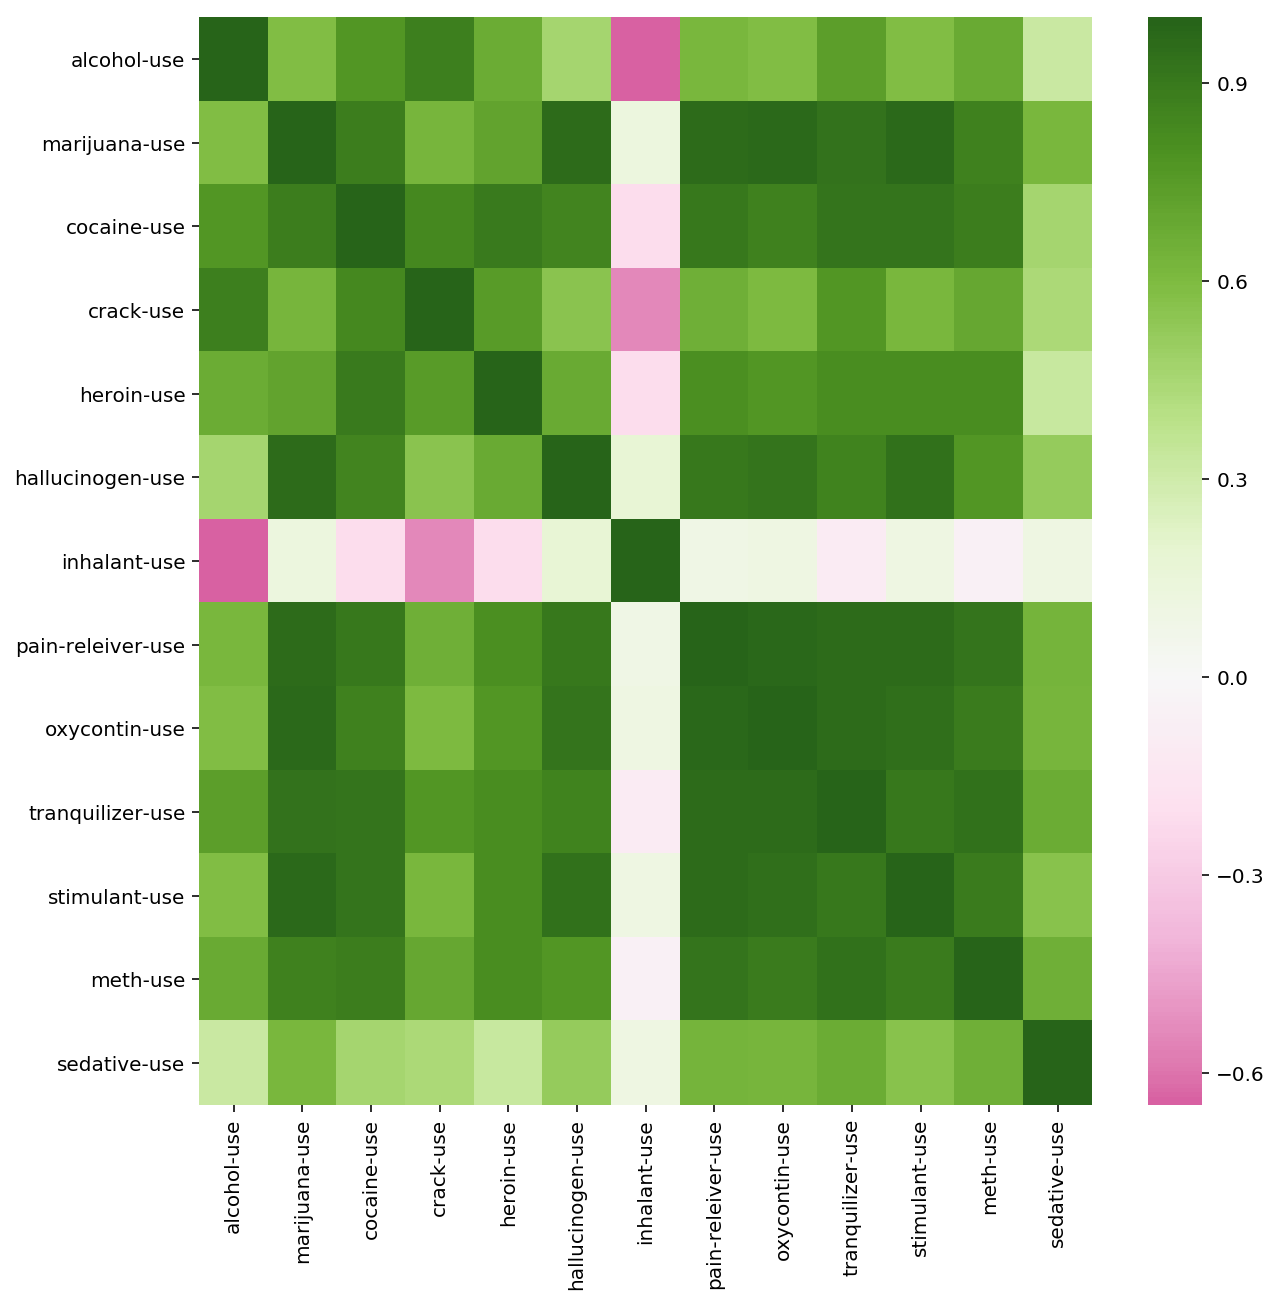

In [242]:
df2 = df1.iloc[:,[2,4,6,8,10,12,14,16,18,20,22,24,26]] # Split df1 into use columns

df3 = df1.iloc[:,[3,5,7,9,11,13,15,17,19,21,23,25,27]] # Split df1 into freq columns


matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(df2.corr(), cmap="PiYG", center=0)

# Heatmap showing use correlations

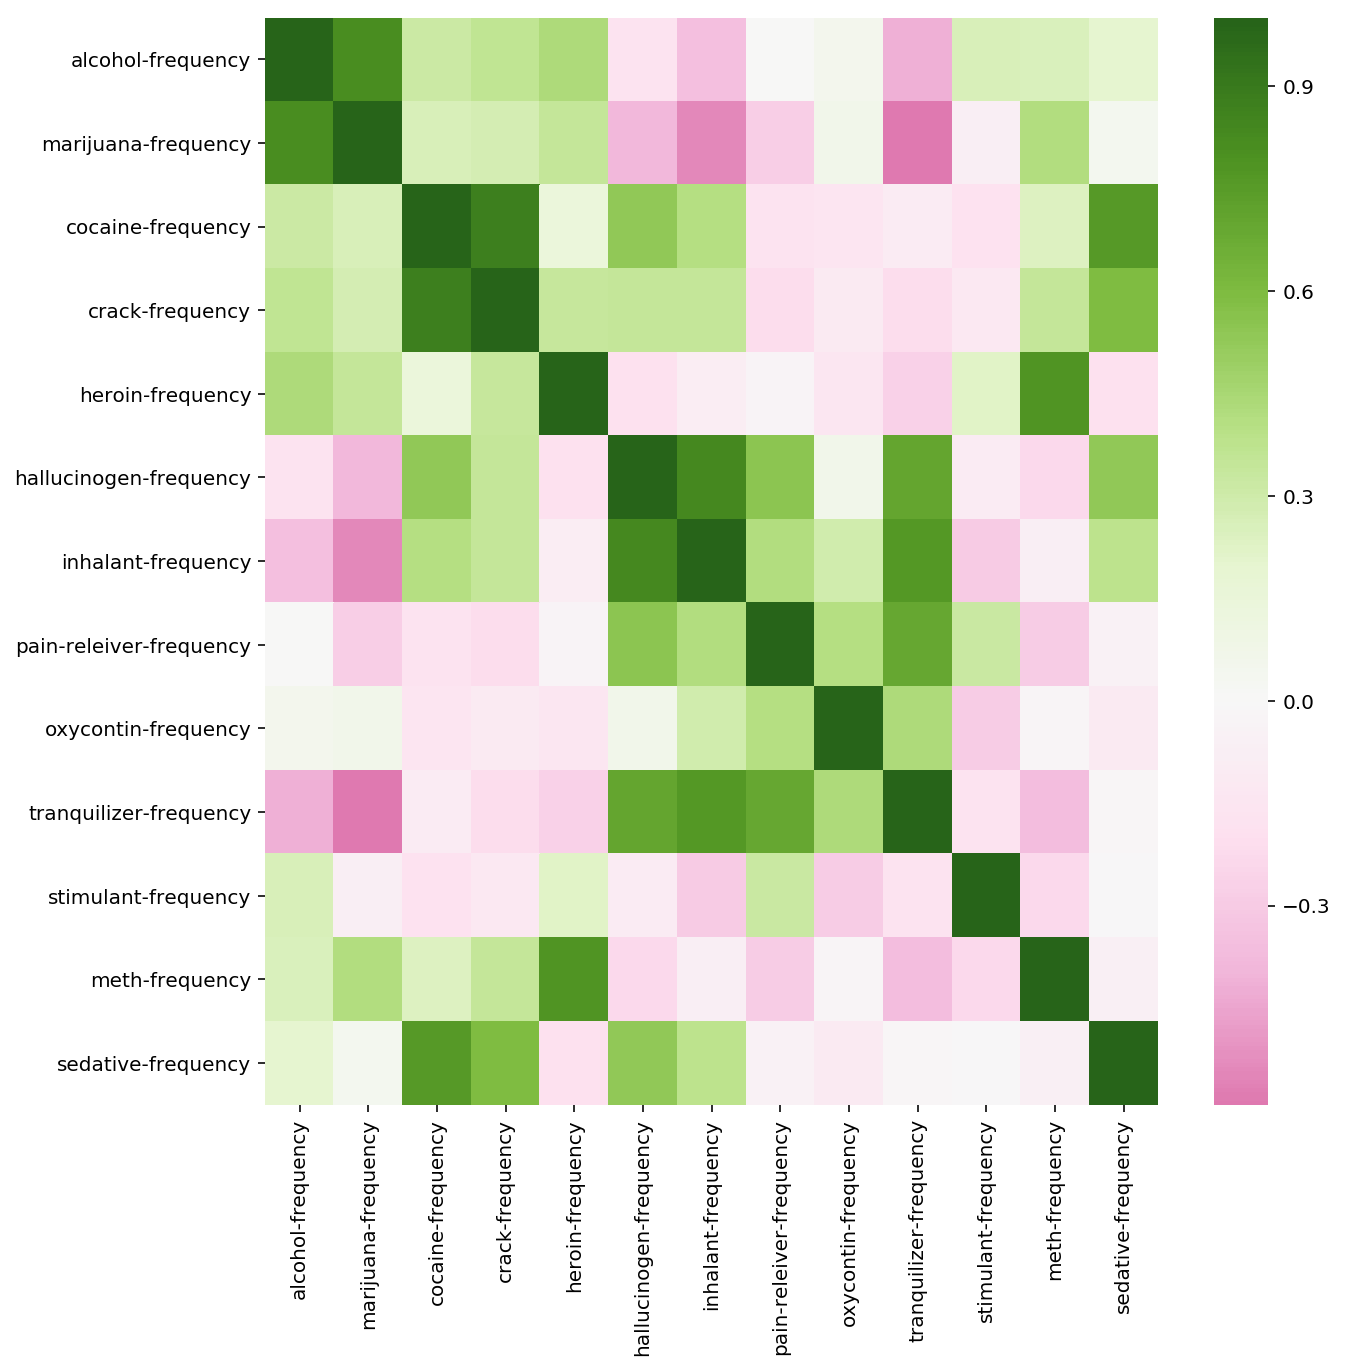

In [243]:
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(df3.corr(), cmap="PiYG", center=0)

## <span style="color:blue">Observations:</span>
**1. Drug use correlations:**  
It is observed that most drug use are correlated with one another, except for inhalant use.

**2. Drug frequency of use correlations:**  
Drug frequencies do not seem to be correlated.

Text(0,0.5,u'useage')

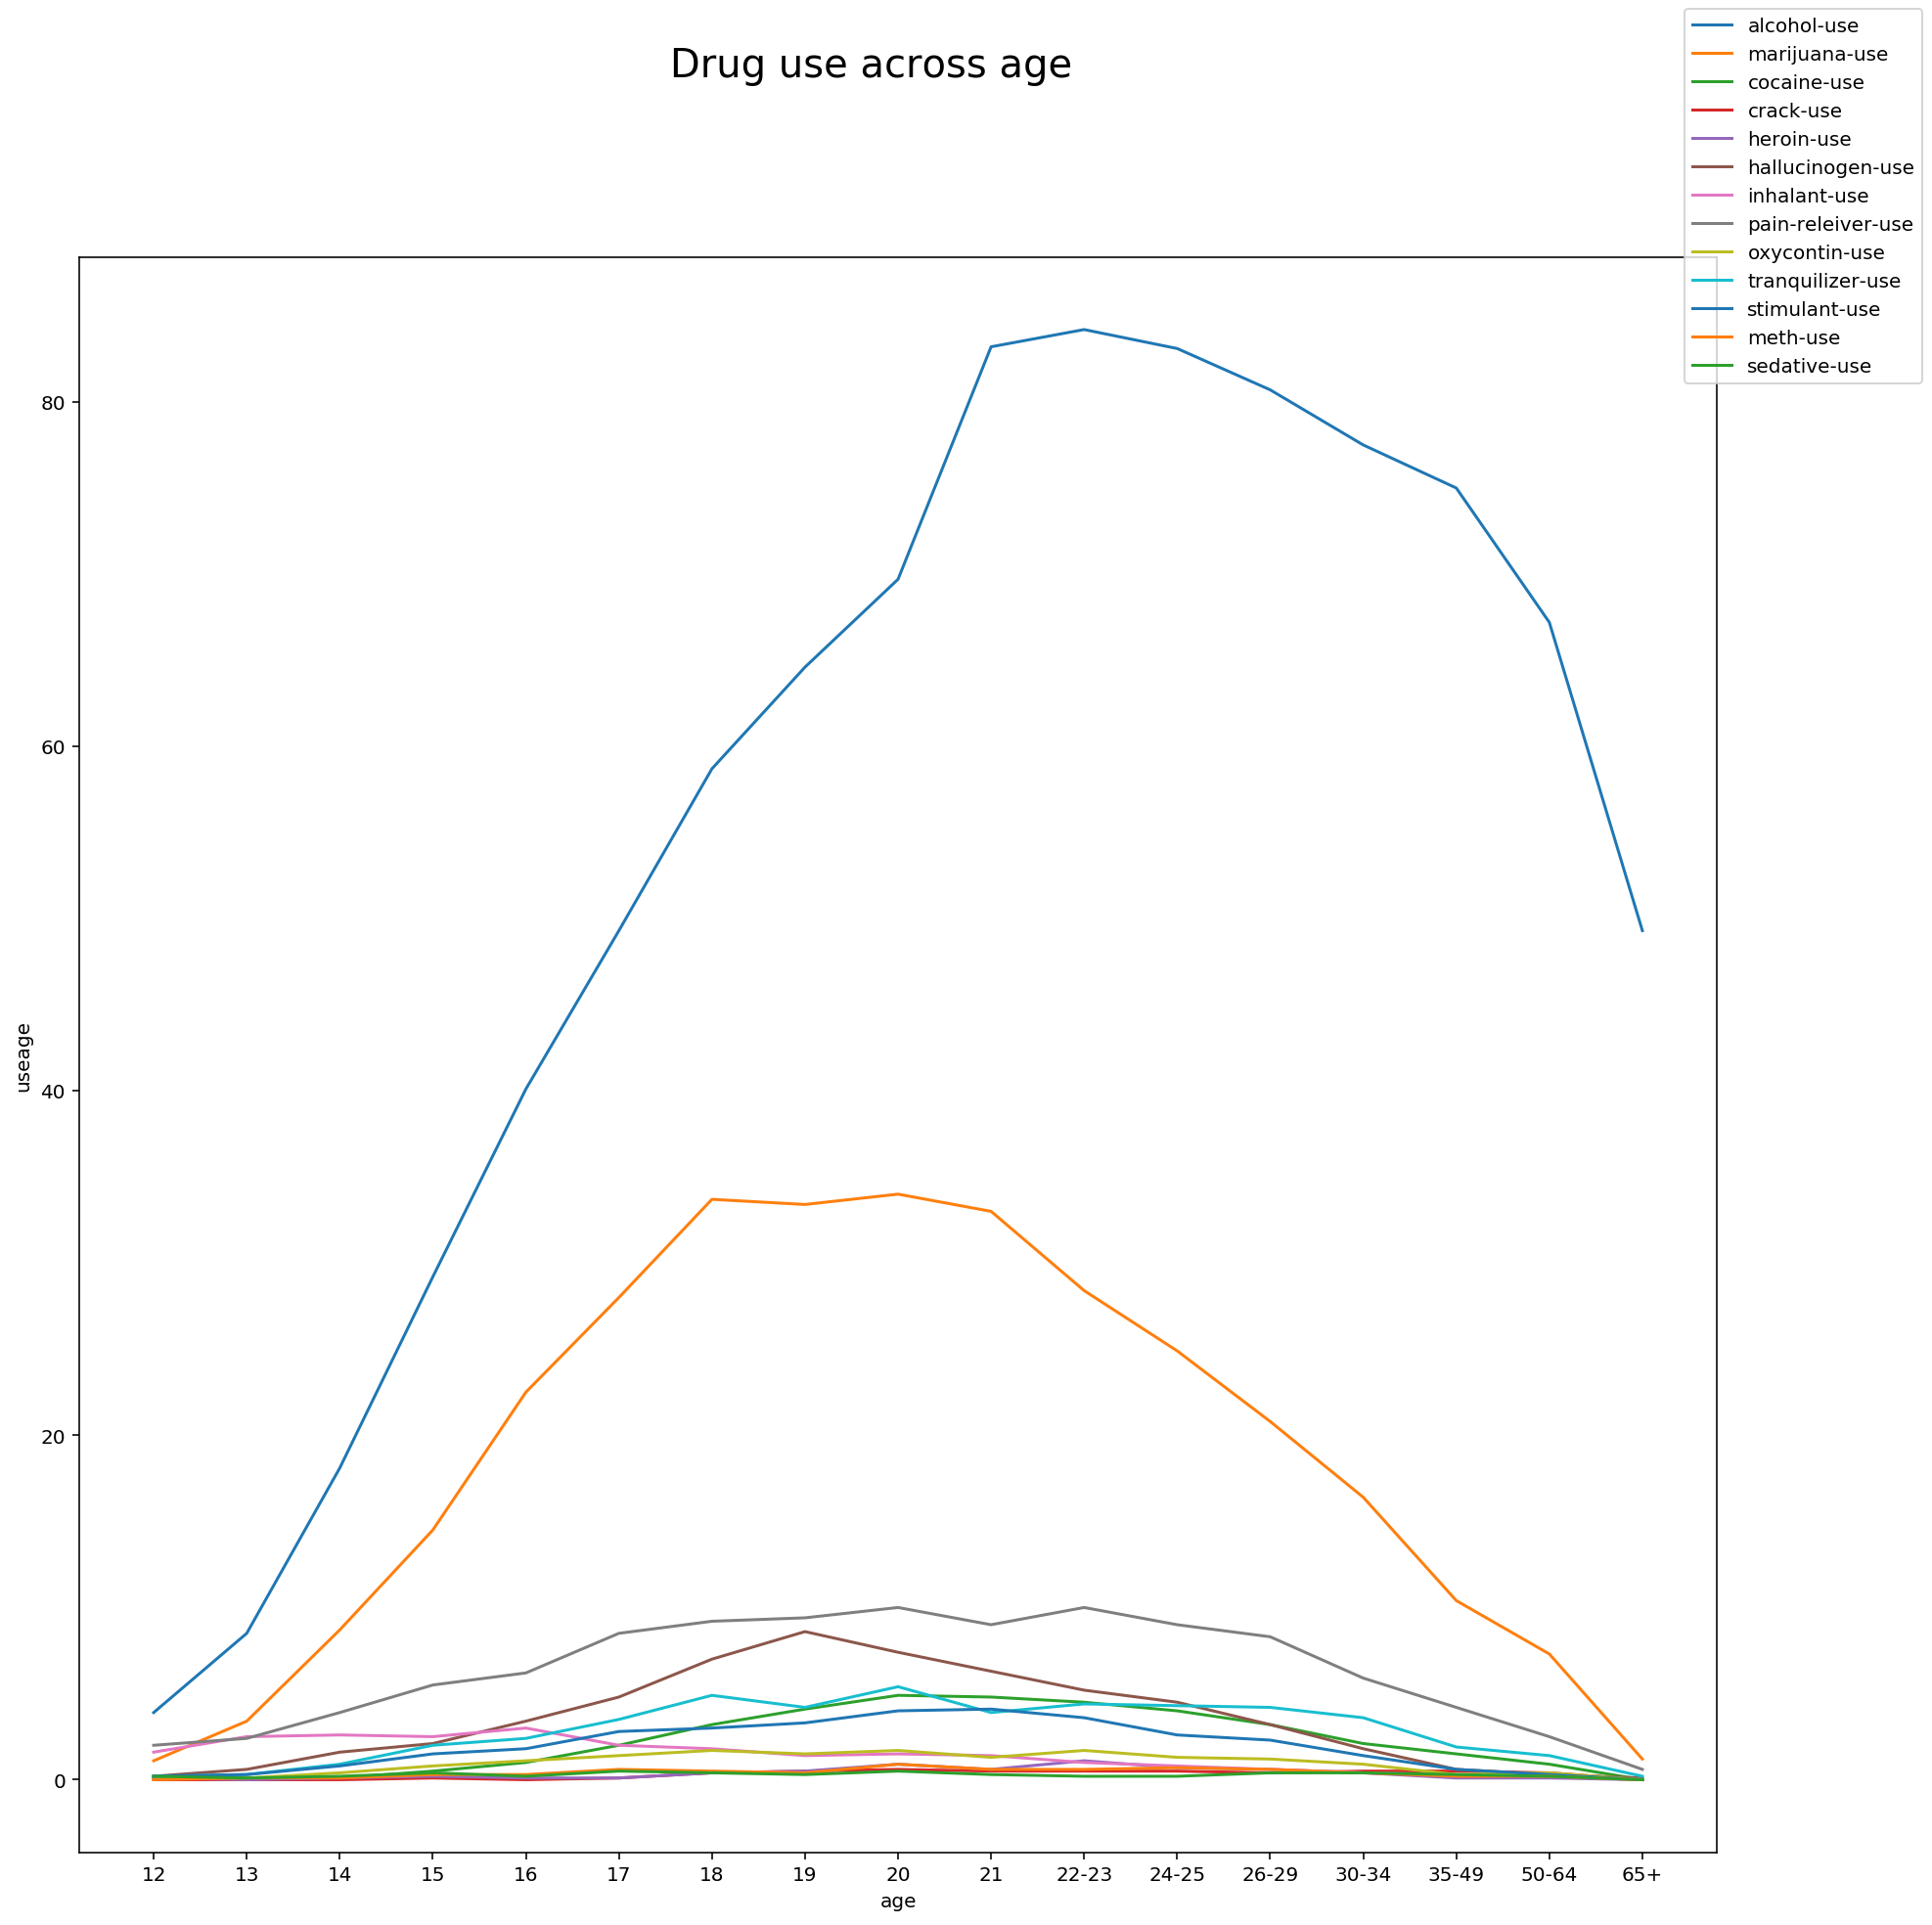

In [244]:
# Plotting drug use across age
f, ax = plt.subplots(figsize=(15, 15))

x = df1['age']

for col in df2.columns:
    y = df2[col]
    plt.plot(x, y)

f.suptitle('Drug use across age',fontsize = 20)
f.legend()
plt.xlabel('age')
plt.ylabel('useage')

## <span style="color:blue">Observations:</span>
The predominant drugs that are used across all age groups are the following:
1. Alchohol
2. Marijuana
3. Cocaine

Text(0,0.5,u'frequency')

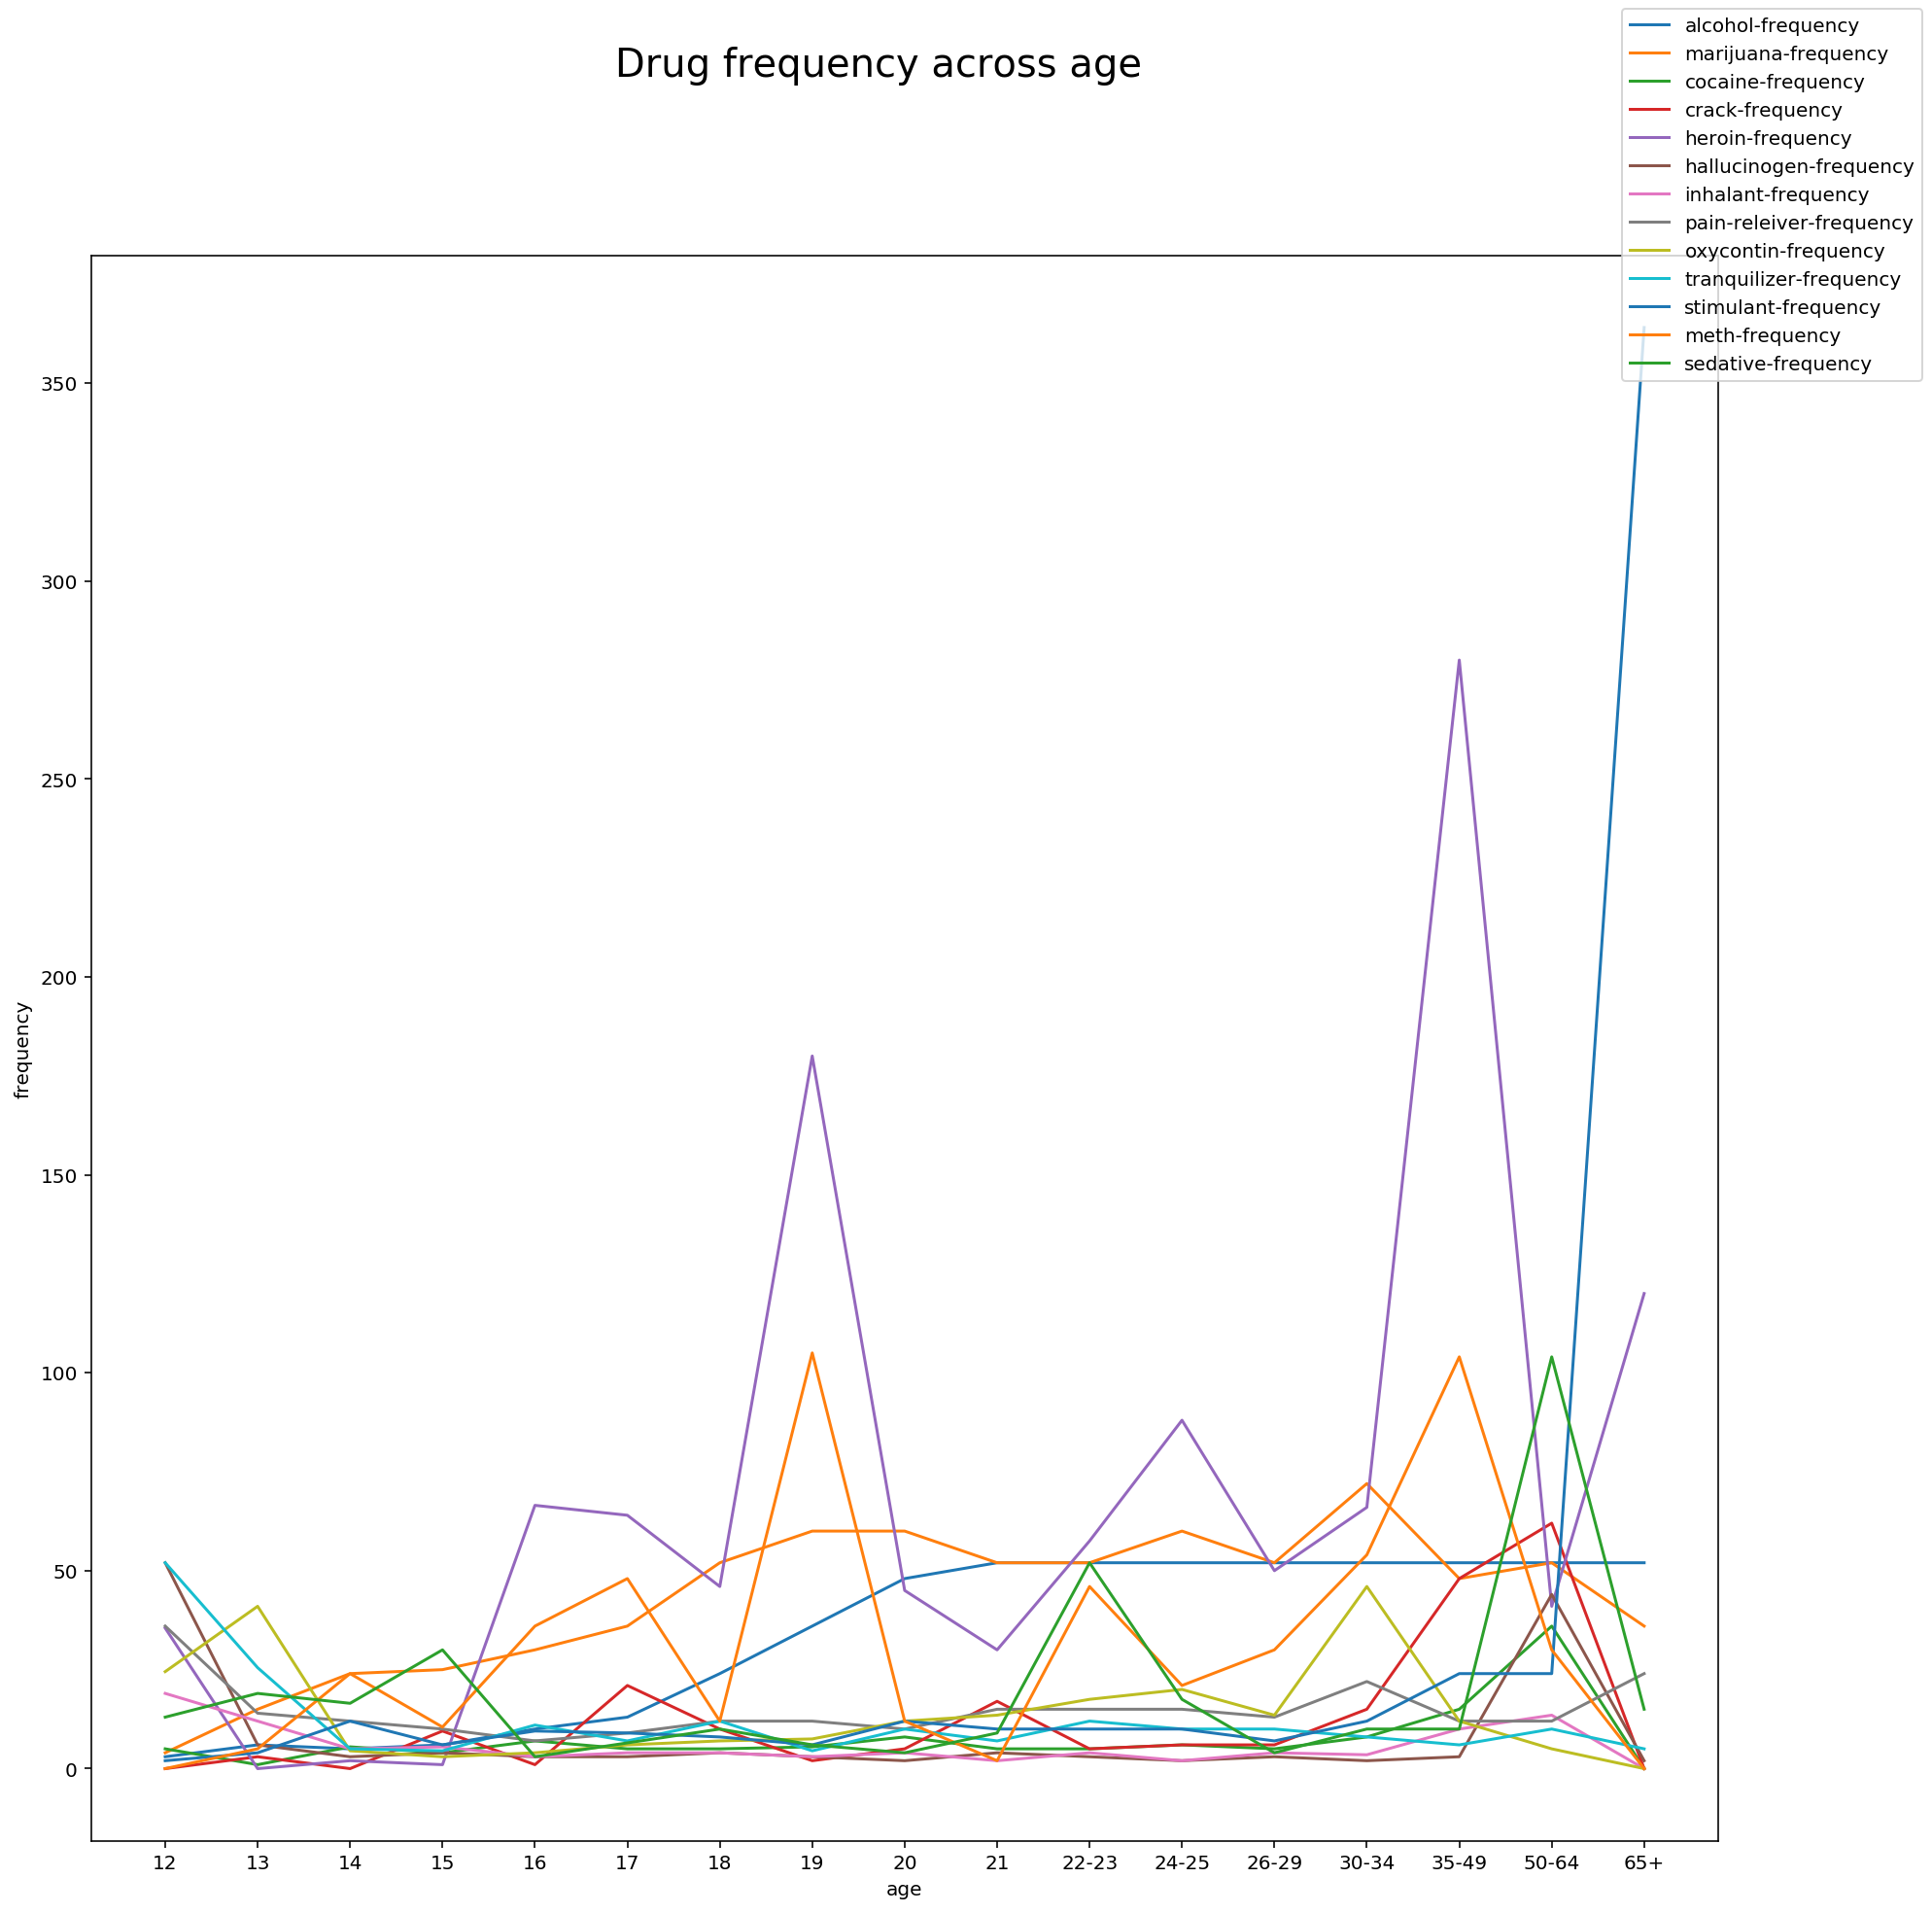

In [245]:
# Plotting drug use frequency across age
f, ax = plt.subplots(figsize=(15, 15))

x = df1['age']

for col in df3.columns:
    y = df3[col]
    plt.plot(x, y)

f.suptitle('Drug frequency across age',fontsize = 20)
f.legend()
plt.xlabel('age')
plt.ylabel('frequency')

## <span style="color:blue">Observations:</span>
Frequency of drug use does not follow a pattern but interestingly there are spikes in certain ages where frequency of a drug use is high.

### 7.3 Create a testable hypothesis about this data

<span style="color:blue">** Question and deliverables**<span>

Question: Are the means of drug use across age groups different from one another; specifically is the mean of drug use amongst adolescents (age 21 and below) different from mean of drug use amongst non-adolescents (age >21)

In [246]:
# Compile mean of drug use among columns for every row
df2['mean_use']=df2.mean(axis=1)
df2['minor_label'] = 0 # initialise label column

df2.loc[[0,1,2,3,4,5,6,7,8,9],['minor_label']]=1 # minors are labelled group 1

mean_ado = df2.loc[[0,1,2,3,4,5,6,7,8,9],'mean_use'].sum()/10

mean_nonado = df2.loc[[10,11,12,13,14,15,16],'mean_use'].sum()/7

print mean_nonado

df2


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


8.22967912088


,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,mean_use,minor_label
0,3.9,1.1,0.1000,0.0001,0.1000,0.2,1.6000,2.0,0.1000,0.2,0.2000,0.0001,0.2000,0.746169,1
1,8.5,3.4,0.1000,0.0001,0.0001,0.6,2.5000,2.4,0.1000,0.3,0.3000,0.1000,0.1000,1.415400,1
2,18.1,8.7,0.1000,0.0001,0.1000,1.6,2.6000,3.9,0.4000,0.9,0.8000,0.1000,0.2000,2.884623,1
3,29.2,14.5,0.5000,0.1000,0.2000,2.1,2.5000,5.5,0.8000,2.0,1.5000,0.3000,0.4000,4.584615,1
4,40.1,22.5,1.0000,0.0001,0.1000,3.4,3.0000,6.2,1.1000,2.4,1.8000,0.3000,0.2000,6.315392,1
5,49.3,28.0,2.0000,0.1000,0.1000,4.8,2.0000,8.5,1.4000,3.5,2.8000,0.6000,0.5000,7.969231,1
6,58.7,33.7,3.2000,0.4000,0.4000,7.0,1.8000,9.2,1.7000,4.9,3.0000,0.5000,0.4000,9.607692,1
7,64.6,33.4,4.1000,0.5000,0.5000,8.6,1.4000,9.4,1.5000,4.2,3.3000,0.4000,0.3000,10.169231,1
8,69.7,34.0,4.9000,0.6000,0.9000,7.4,1.5000,10.0,1.7000,5.4,4.0000,0.9000,0.5000,10.884615,1
9,83.2,33.0,4.8000,0.5000,0.6000,6.3,1.4000,9.0,1.3000,3.9,4.1000,0.6000,0.3000,11.461538,1


In [247]:
# perform t test
# Let null hypothesis be: The mean overall drug use for adolescents is equals to the mean overall drug use for non-adolescents

list1 = df2['mean_use'].tolist()
list2 = list1[-7:]
list3 = list1[0:10]

stats.ttest_ind(list3, list2)

Ttest_indResult(statistic=-0.94213218959786749, pvalue=0.36105217344934259)

[[Text(0,0,u'Non-minor (>21 y.o.)'), Text(0,0,u'Minor (<=21 y.o.)')],
 Text(0.5,1,u'Box Plot of overall drug use')]

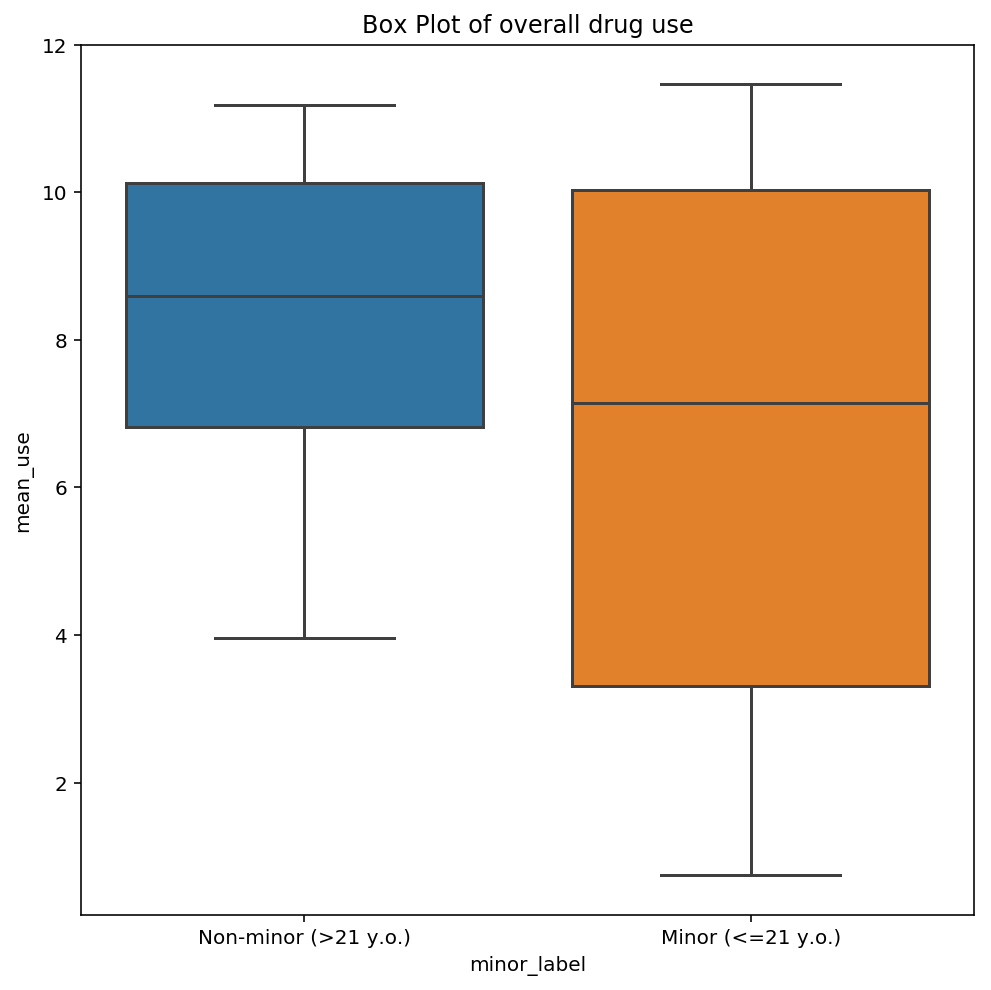

In [248]:
# Visualisation of values using box plot
plt.subplots(figsize=(8,8))
ax = sns.boxplot(x='minor_label', y='mean_use', data=df2)
ax.set(xticklabels=['Non-minor (>21 y.o.)', 'Minor (<=21 y.o.)'], title='Box Plot of overall drug use')


<img src="https://i.imgur.com/wLPdKgZ.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
## 8. **Report**

## Problem:  
Is there a method to segment age groups?  
What aggregate parameters can we compare amongst the groups?  

## Approach:  
From the column labels, age 21 and below are represented in single columns while age 22 and above are represented in age ranges. It is fair to seggregate the ages into 2 separate groups, the minors(21 and below) and non-minors(22 and above). In the U.S., youths aged 21 and below may be still categorised as minors in the eyes of the law which indicates a good way to split the dataset into 2 groups.  

Some data preparation will be done to prepare the dataset from analysis:  
1. label the rows accordingly to minors (label=1) / non-minors (label=0)
2. decide on parameter to investigate. In this case, mean overall drug use will be compared between the 2 groups as it is indicative of whether minors are more prone to drug use.
3. t test to be done to compare between mean drug use between 2 groups.  

## Results:  
p-value of 0.361 indicates that we do not reject null hypothesis. We may infer that the mean drug use between minors and non minors have no statistically significant difference.  

Box plot visually shows that both group means are quite close to each other.


<img src="https://i.imgur.com/wLPdKgZ.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

In [249]:
datasat['Rate']

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
Name: Rate, dtype: int64

Rate does not seem to have outliers since it is a percentage range and most values fall between 1 to 100.

**Definition of outlier: **  
An outlier is defined to be a value that is 1.5x inter-quartile range away from the first or third quartile.

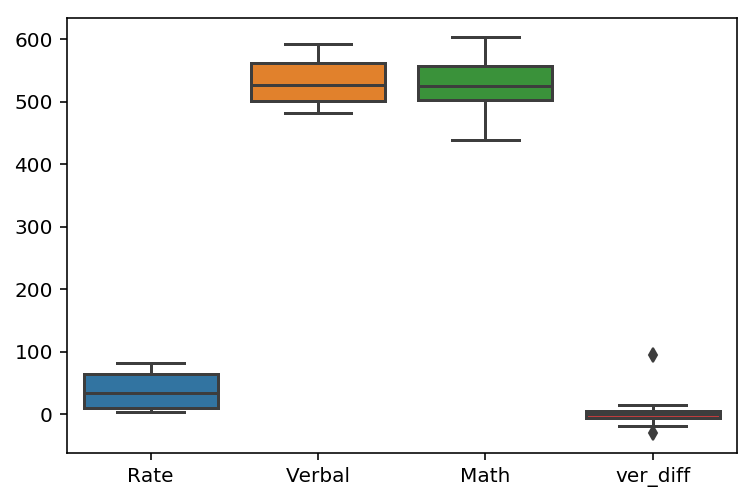

In [250]:
sns.boxplot(data=datasat)
# box plot shows that only ver_diff has outliers

In [251]:
# Function to calculate +/- 1.5 IQR range for outliers , ie, values that fall beyond this range will be considered outliers
def iqr(series):
    q1 = datasat[series].quantile(0.25)
    q3 = datasat[series].quantile(0.75)
    iqr = q3 - q1
    out_range = [q1-1.5*iqr, q3+1.5*iqr]
    return out_range


In [252]:
print 'outlier range for \'Rate\' is :', iqr('Rate')
print 'outlier range for \'Verbal\' is :', iqr('Verbal')
print 'outlier range for \'Math\' is :', iqr('Math')
print 'outlier range for \'ver_diff\' is :', iqr('ver_diff')

outlier range for 'Rate' is : [-73.5, 146.5]
outlier range for 'Verbal' is : [409.5, 653.5]
outlier range for 'Math' is : [421.25, 639.25]
outlier range for 'ver_diff' is : [-21.75, 20.25]


## <span style="color:blue">Observations:</span>
Since the 3 main columns (rate, verbal and math) fall within the outlier range of values, there are no outliers in these columns.  

For the ver_diff column, which is a difference in verbal and math scores, outliers may arise if the difference in the 2 columns is large. Thus, it will not be useful to remove the outliers in this column since this measures a difference, which may be a feature we might be interested in.


<img src="https://i.imgur.com/wLPdKgZ.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

In [253]:
# Spearman correlation
datasat.corr(method='spearman').loc[['Math'],['Verbal']]

,Verbal
Math,0.909413


In [254]:
# Pearson correlation
datasat.corr(method='pearson').loc[['Math'],['Verbal']]

,Verbal
Math,0.899909


## <span style="color:blue">Observations:</span>
Q1: Spearman correlation between verbal and math has a slightly higher value than pearson correlation.  

Q2: The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the ranked variables.  

Calculation process: 
First, we rank the variables in each column that we are calculating, in order of magnitude. Then we compute the difference in ranks between the 2 variables, d and square it.

We then calculate the following:
$$\sum d_i^{2}$$

And substitute appropriate values into:  
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/ee773221f85a9ab9ed0e13813d9d1ccafa5dda4e)

### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [255]:
datasat['rate_percent'] = datasat['Rate'].map(lambda x: stats.percentileofscore(datasat['Rate'],x))

datasat.head(5)

,State,Rate,Verbal,Math,ver_diff,rate_percent
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.039216
2,MA,79,511,515,-4,96.078431
3,NY,77,495,505,-10,94.117647
4,NH,72,520,516,4,92.156863


## <span style="color:blue">Observations:</span>  
The percentile shows the ranking of the variable, ie, the higher the percentile, the higher ranked the variable is.

### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

## <span style="color:blue">Observations:</span>  
Outliers will be autoassigned the 100th percentile or close to 0th percentile of an array due to its divergence from the range of most values in a variable.

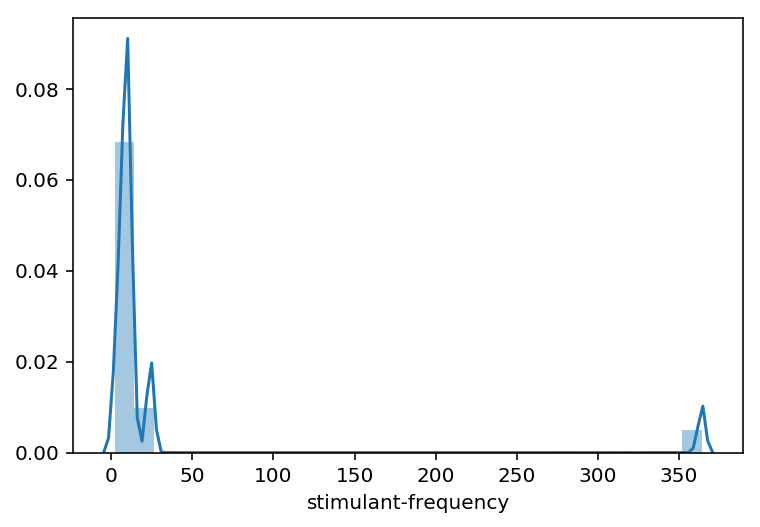

In [256]:
# Dist plot of drug: stimulant frequency column
sns.distplot(df1['stimulant-frequency'],bins=30,kde=True)

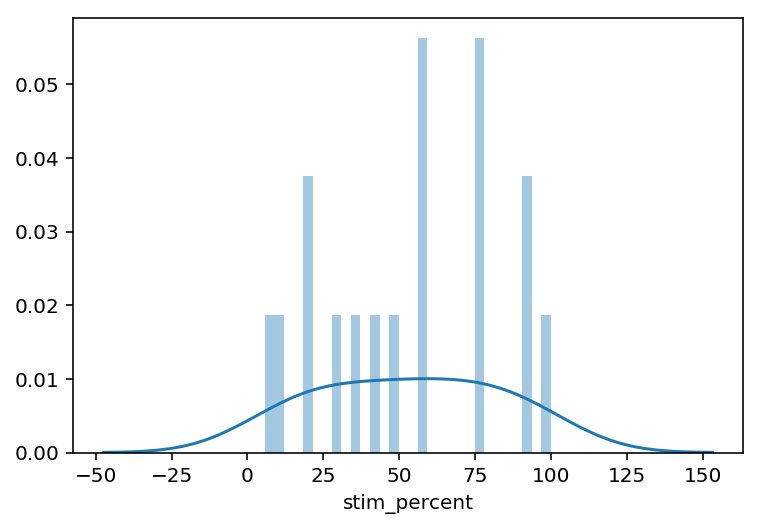

In [257]:
# Dist plot of stimulant freq percentiles
df1['stim_percent'] = df1['stimulant-frequency'].map(lambda x: stats.percentileofscore(df1['stimulant-frequency'],x))
sns.distplot(df1['stim_percent'],bins=30,kde=True)

## <span style="color:blue">Observations:</span>  
By plotting percentiles rather than the variable itself, it smoothens the distribution and tends it looking somewhat smillar to a symmetric distribuion centred around 50th percentile.